In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [50]:
df = pd.read_csv('1718.csv')
df = df[df['isMainSleep'] == 1]
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [51]:
eff = df[['participID', 'dataDate', 'efficiency', 'week_start']]
eff


,participID,dataDate,efficiency,week_start
0,3LZGLG,2017-08-25,95,2017-08-21
1,3LZGLG,2017-08-26,94,2017-08-21
2,3LZGLG,2017-08-27,96,2017-08-21
3,3LZGLG,2017-08-28,96,2017-08-28
4,3LZGLG,2017-08-29,96,2017-08-28
...,...,...,...,...
46221,5YSG6K,2018-05-07,95,2018-05-07
46222,5YSG6K,2018-05-08,97,2018-05-07
46223,5YSG6K,2018-05-09,97,2018-05-07
46224,5YSG6K,2018-05-10,96,2018-05-07


In [52]:
eff = eff.groupby(['participID', 'week_start'], as_index=False).mean()
eff.head()

,participID,week_start,efficiency
0,3LZGLG,2017-08-21,95.000000
1,3LZGLG,2017-08-28,95.285714
2,3LZGLG,2017-09-04,95.714286
3,3LZGLG,2017-09-11,94.428571
4,3LZGLG,2017-09-18,92.714286


In [53]:
pivot = eff.pivot(index='participID', columns='week_start', values='efficiency')
pivot.head()

week_start,2017-08-21,2017-08-28,2017-09-04,2017-09-11,2017-09-18,2017-09-25,2017-10-02,2017-10-09,2017-10-16,2017-10-23,...,2018-03-05,2018-03-12,2018-03-19,2018-03-26,2018-04-02,2018-04-09,2018-04-16,2018-04-23,2018-04-30,2018-05-07
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,95.00,95.285714,95.714286,94.428571,92.714286,94.833333,97.285714,97.428571,95.714286,96.428571,...,96.285714,94.857143,95.571429,94.500000,95.428571,95.857143,95.000000,95.571429,95.000000,95.8
3LZJFK,96.75,94.800000,96.166667,96.428571,94.142857,96.857143,95.285714,96.333333,95.285714,95.666667,...,94.857143,95.857143,93.857143,95.428571,95.571429,93.571429,95.571429,94.714286,96.857143,93.8
3LZRZQ,97.00,97.714286,96.571429,97.571429,97.142857,97.166667,95.714286,97.000000,95.714286,97.142857,...,95.142857,97.000000,96.714286,93.000000,94.500000,95.666667,92.571429,95.571429,93.166667,93.0
3M29ZH,97.60,97.714286,97.166667,99.000000,98.285714,96.571429,98.000000,97.571429,97.666667,98.800000,...,98.666667,97.333333,97.200000,97.666667,97.857143,97.166667,96.714286,96.833333,97.142857,97.4
3M2QNS,94.75,94.250000,93.166667,90.000000,94.500000,95.750000,89.666667,NaN,89.333333,95.333333,...,95.500000,NaN,NaN,NaN,NaN,93.000000,NaN,94.800000,96.000000,NaN


In [54]:
pivot_drop = pivot.dropna()
#68 participants who had at least one night of data from all 37 weeks 

In [55]:
pdrop= pivot_drop[(np.abs(stats.zscore(pivot_drop)) < 3).all(axis=1)]

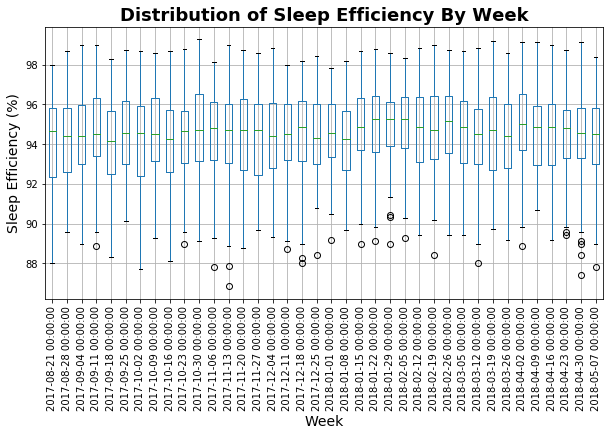

In [56]:
pdrop.boxplot(figsize=(10,5))
plt.xticks(rotation=90);
plt.title('Distribution of Sleep Efficiency By Week', fontsize=18, fontweight='bold');
plt.ylabel('Sleep Efficiency (%)', fontsize=14);
plt.xlabel('Week', fontsize=14);

In [57]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [58]:
pd_flat = pdrop.reset_index()

In [59]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        paired_t_test(this_week, next_week)

2017-08-28 00:00:00
2017-09-04 00:00:00
2017-09-11 00:00:00
2017-09-18 00:00:00
reject null hypothesis
2017-09-25 00:00:00
reject null hypothesis
2017-10-02 00:00:00
2017-10-09 00:00:00
2017-10-16 00:00:00
reject null hypothesis
2017-10-23 00:00:00
reject null hypothesis
2017-10-30 00:00:00
2017-11-06 00:00:00
2017-11-13 00:00:00
2017-11-20 00:00:00
2017-11-27 00:00:00
2017-12-04 00:00:00
2017-12-11 00:00:00
2017-12-18 00:00:00
2017-12-25 00:00:00
2018-01-01 00:00:00
2018-01-08 00:00:00
2018-01-15 00:00:00
reject null hypothesis
2018-01-22 00:00:00
2018-01-29 00:00:00
2018-02-05 00:00:00
2018-02-12 00:00:00
2018-02-19 00:00:00
2018-02-26 00:00:00
2018-03-05 00:00:00
reject null hypothesis
2018-03-12 00:00:00
reject null hypothesis
2018-03-19 00:00:00
2018-03-26 00:00:00
2018-04-02 00:00:00
reject null hypothesis
2018-04-09 00:00:00
reject null hypothesis
2018-04-16 00:00:00
2018-04-23 00:00:00
2018-04-30 00:00:00
2018-05-07 00:00:00


In [60]:
# checking normality: is paired t test the right thing to be doing?

In [61]:
def check_normal(before, after):
    diff = before - after
    diff.plot(kind='hist', title= 'Efficiency Difference')
    plt.show()

In [62]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
       # print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
       # check_normal(this_week, next_week)

## Wilcoxon Signed Rank Test
### No assumptions about normality

In [63]:
def wilcoxon_t_test(before, after, pvals):
    ttest,pval = stats.wilcoxon(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    pvals.append(pval)
    #else:
    #    print("accept null hypothesis")stats.wilcoxon(df['bp_before'], df['bp_after'])

In [64]:
weeks = pdrop.columns
pvals = []
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2017-08-28 00:00:00
2017-09-04 00:00:00
2017-09-11 00:00:00
2017-09-18 00:00:00
reject null hypothesis
2017-09-25 00:00:00
reject null hypothesis
2017-10-02 00:00:00
2017-10-09 00:00:00
2017-10-16 00:00:00
reject null hypothesis
2017-10-23 00:00:00
reject null hypothesis
2017-10-30 00:00:00
reject null hypothesis
2017-11-06 00:00:00
2017-11-13 00:00:00
2017-11-20 00:00:00
2017-11-27 00:00:00
2017-12-04 00:00:00
2017-12-11 00:00:00
2017-12-18 00:00:00
2017-12-25 00:00:00
2018-01-01 00:00:00
2018-01-08 00:00:00
2018-01-15 00:00:00
reject null hypothesis
2018-01-22 00:00:00
2018-01-29 00:00:00
2018-02-05 00:00:00
2018-02-12 00:00:00
2018-02-19 00:00:00
2018-02-26 00:00:00
reject null hypothesis
2018-03-05 00:00:00
reject null hypothesis
2018-03-12 00:00:00
reject null hypothesis
2018-03-19 00:00:00
2018-03-26 00:00:00
2018-04-02 00:00:00
reject null hypothesis
2018-04-09 00:00:00
reject null hypothesis
2018-04-16 00:00:00
2018-04-23 00:00:00
2018-04-30 00:00:00
2018-05-07 00:00:00


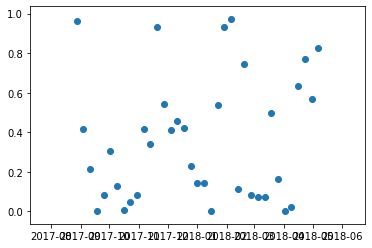

In [65]:
w2w = weeks[1:]
plt.scatter(w2w, pvals)

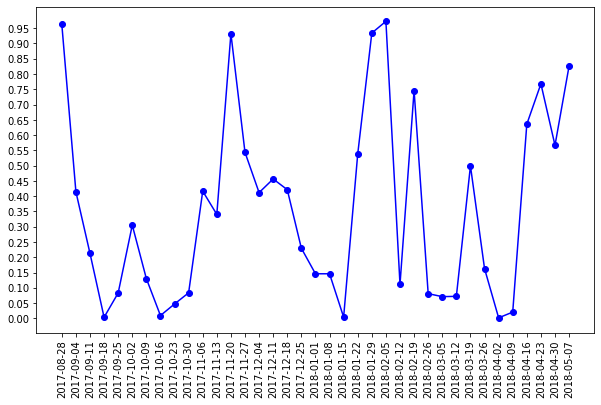

In [66]:
plt.figure(figsize=(10,6));
myplot = plt.plot(w2w, pvals, marker='o', color='blue')
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.xticks(w2w);
plt.show()

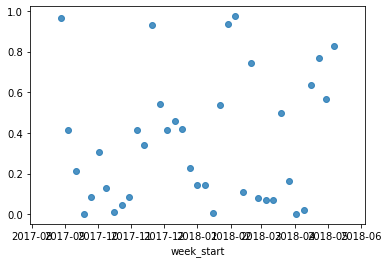

In [67]:
# Add a column: the color depends of x and y values, but you can use whatever function.
#value=(df['x']>0.2) & (df['y']>0.4)
#df['color']= np.where( value==True , "#9b59b6", "#3498db")
# plot
sns.regplot(w2w, pvals, fit_reg=False, marker='o')
            #, scatter_kws={'facecolors':df['color']})
#sns.plt.show()


In [68]:
w2w

DatetimeIndex(['2017-08-28', '2017-09-04', '2017-09-11', '2017-09-18',
               '2017-09-25', '2017-10-02', '2017-10-09', '2017-10-16',
               '2017-10-23', '2017-10-30', '2017-11-06', '2017-11-13',
               '2017-11-20', '2017-11-27', '2017-12-04', '2017-12-11',
               '2017-12-18', '2017-12-25', '2018-01-01', '2018-01-08',
               '2018-01-15', '2018-01-22', '2018-01-29', '2018-02-05',
               '2018-02-12', '2018-02-19', '2018-02-26', '2018-03-05',
               '2018-03-12', '2018-03-19', '2018-03-26', '2018-04-02',
               '2018-04-09', '2018-04-16', '2018-04-23', '2018-04-30',
               '2018-05-07'],
              dtype='datetime64[ns]', name='week_start', freq=None)

In [69]:
types = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
        ]


In [70]:
w = w2w.map(lambda x: str(x)[0:10])
w

Index(['2017-08-28', '2017-09-04', '2017-09-11', '2017-09-18', '2017-09-25',
       '2017-10-02', '2017-10-09', '2017-10-16', '2017-10-23', '2017-10-30',
       '2017-11-06', '2017-11-13', '2017-11-20', '2017-11-27', '2017-12-04',
       '2017-12-11', '2017-12-18', '2017-12-25', '2018-01-01', '2018-01-08',
       '2018-01-15', '2018-01-22', '2018-01-29', '2018-02-05', '2018-02-12',
       '2018-02-19', '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
       '2018-03-26', '2018-04-02', '2018-04-09', '2018-04-16', '2018-04-23',
       '2018-04-30', '2018-05-07'],
      dtype='object', name='week_start')

In [71]:
df_type = pd.DataFrame([w, types])
df_type

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,2017-08-28,2017-09-04,2017-09-11,2017-09-18,2017-09-25,2017-10-02,2017-10-09,2017-10-16,2017-10-23,2017-10-30,...,2018-03-05,2018-03-12,2018-03-19,2018-03-26,2018-04-02,2018-04-09,2018-04-16,2018-04-23,2018-04-30,2018-05-07
1,2nd Week Back,Normal,Normal,Normal,Normal,Normal,Pre-Exams,Exams,Break,Back from Break,...,Exams,Break,Back from Break,2nd Week Back,Back from Break,2nd Week Back,Normal,Normal,Pre-Exams,Exams


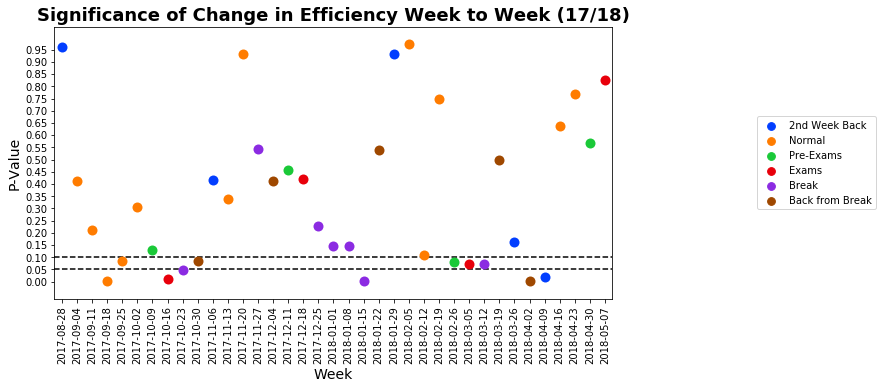

In [72]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=w, y=pvals, hue=types, size = 10, palette= 'bright');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y=.1, xmin=0, xmax=1, color='black', linestyle='--');
plt.axhline(y=.05, xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('P-Value', fontsize=14);
plt.title('Significance of Change in Efficiency Week to Week (17/18)', fontsize=18, fontweight='bold');

In [33]:
def compareMean(weekData, pvals):
    tset, pval = ttest_1samp(weekData, pd_flat.mean().mean())
    pvals.append(pval)
    print(pval)
    if pval < 0.10:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    #else:
        #print("we are accepting null hypothesis")

In [34]:
weeks = pdrop.columns
pvals = []
for w in weeks:
    print(w)
    this_week = pd_flat[w]
    compareMean(this_week, pvals)

2017-08-21 00:00:00
0.3261571686159852
2017-08-28 00:00:00
0.3967990725743381
2017-09-04 00:00:00
0.7437301448094791
2017-09-11 00:00:00
0.5367146626328669
2017-09-18 00:00:00
0.16104741877000378
2017-09-25 00:00:00
0.8194684202208204
2017-10-02 00:00:00
0.5142225261567481
2017-10-09 00:00:00
0.7676242436870807
2017-10-16 00:00:00
0.06658029181171543
 we are rejecting null hypothesis
2017-10-23 00:00:00
0.6361213708708567
2017-10-30 00:00:00
0.5479899043795222
2017-11-06 00:00:00
0.9221970904877126
2017-11-13 00:00:00
0.7030304034751114
2017-11-20 00:00:00
0.632525356610985
2017-11-27 00:00:00
0.43008449768293444
2017-12-04 00:00:00
0.6827643872769541
2017-12-11 00:00:00
0.9746327675937284
2017-12-18 00:00:00
0.9303532039010795
2017-12-25 00:00:00
0.43332662683835355
2018-01-01 00:00:00
0.8713620807002463
2018-01-08 00:00:00
0.5537811077757196
2018-01-15 00:00:00
0.14005087535050476
2018-01-22 00:00:00
0.08892011385904347
 we are rejecting null hypothesis
2018-01-29 00:00:00
0.07594235

In [35]:
ww = [str(x)[0:10] for x in weeks]

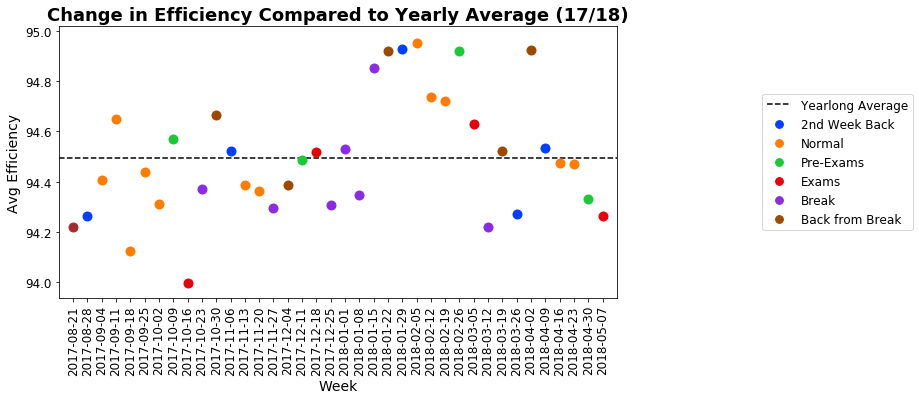

In [77]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=np.arange(1, 38), y=pd_flat.mean()[1:], hue=types, size = 10, palette= 'bright');

plt.xlim(-2, 37);
plt.scatter(-1, pd_flat.mean()[0], marker='o', s=80, color='brown');
plt.xticks(range(-1, len(ww)-1),ww, fontsize=12);
plt.xticks(rotation=90);
plt.yticks(fontsize=12)
#plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y= pd_flat.mean().mean(), xmin=0, xmax=1, color='black', linestyle='--', label="Yearlong Average");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=12);
plt.xlabel('Week', fontsize=14);
plt.ylabel('Avg Efficiency', fontsize=14);
plt.title('Change in Efficiency Compared to Yearly Average (17/18)', fontsize=18, fontweight='bold');
plt.savefig('Figure5c', dpi=300, bbox_inches="tight");